# 19.2.2 Build a Basic Neural Network

In [1]:
# Import our dependencies:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

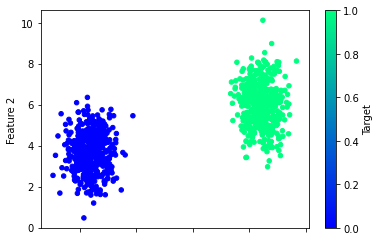

In [2]:
# Generate dummy dataset:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFram with the dummy data:
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data:
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn split dataset:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create scaler instance:
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler:
X_scaler.fit(X_train)

# Scale the data:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model:
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer:
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function:
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the sequential model:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the sequential model together and customize metrics:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 19.2.3 Train and Test a Basic Neural Network

In [10]:
# Fit model to the training data:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.8654 - accuracy: 0.0147 
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8391 - accuracy: 0.0227
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8151 - accuracy: 0.0320
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7944 - accuracy: 0.0467
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.0707
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7591 - accuracy: 0.0947
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7447 - accuracy: 0.1320
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7318 - accuracy: 0.1853
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.2493
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.3227
Epoch 11

24/24 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5160
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5160
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5160
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 93/100


<AxesSubplot:>

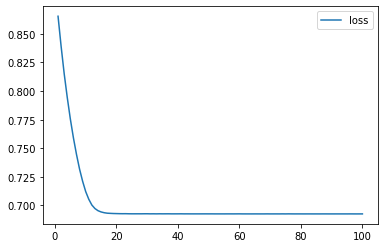

In [11]:
# Create a DataFrame containing training history:
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss:
history_df.plot(y="loss")

<AxesSubplot:>

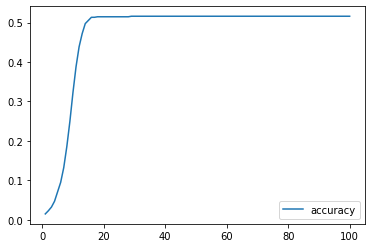

In [12]:
# Plot the accuracy:
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6966 - accuracy: 0.4520 - 146ms/epoch - 18ms/step
Loss: 0.6966330409049988, Accuracy: 0.4519999921321869


In [14]:
# Predict the classification of a new set of blob data:
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=43)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int64")

1/1 [==============================] - 0s 72ms/step


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

# 19.2.4 Nuances of Neural Networks on Nonlinear Numbers

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

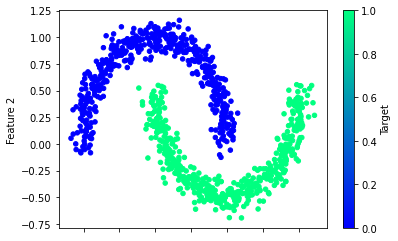

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=42)

# Transforming y_moons to a vertical vector:
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the non linear dummy data:
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data:
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [16]:
# Create training and testing sets:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance:
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler:
X_moon_scaler.fit(X_moon_train)

# Scale the data:
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data:
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4880
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4880
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4880
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4880
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4880
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4880
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4880
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4880
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 89/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 93/100


<AxesSubplot:>

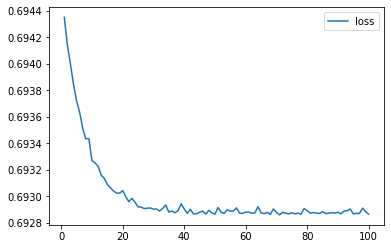

In [19]:
# Create a DataFrame containing training history:
history_df = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history["loss"]) + 1))

# Plot the loss:
history_df.plot(y="loss")

<AxesSubplot:>

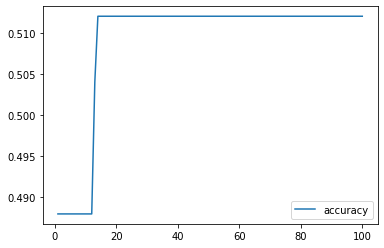

In [20]:
# Plot the accuracy:
history_df.plot(y="accuracy")

# 19.2.5 Create the Connective Tissue, the Multiple Neuron Neural Network

In [21]:
# Generate our new sequential model:
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer:
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data:
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.6960
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.7067
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.7133
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.7187
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.7200
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.7253
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.7280
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7267
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7280
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.7293
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8480
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8467
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8480
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8480
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8480
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8480
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8480
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8480
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8493
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8520
Epoch 93/100
